### **Understanding Bias and Variance**

#### **What Does the Code Do?**

- **Data Generation**:
  - Creates a sine wave (`y_true`) and adds noise to simulate real-world data (`y`).
  - Splits the data into training and test sets.

- **Model Fitting**:
  - Fits polynomial regression models of degrees 1, 4, and 10.
    - **Degree 1**: Linear model (high bias).
    - **Degree 4**: Moderately complex model (good balance).
    - **Degree 10**: Very complex model (high variance).

- **Visualization**:
  - Plots the training data, test data, true function, and model predictions for each degree.

### **Interpreting the Plots**

1. **Degree 1 (High Bias, Low Variance)**:
   - **Observation**: The model is a straight line.
   - **Implication**: It cannot capture the curvature of the sine wave.
   - **Result**: Both training and test errors are high.

2. **Degree 4 (Low Bias, Low Variance)**:
   - **Observation**: The model follows the sine wave closely.
   - **Implication**: It captures the underlying pattern without overfitting.
   - **Result**: Training and test errors are low.

3. **Degree 10 (Low Bias, High Variance)**:
   - **Observation**: The model oscillates wildly, especially between data points.
   - **Implication**: It fits the noise in the training data (overfitting).
   - **Result**: Training error is very low, but test error is high.

### **Why Is This Important?**

- **Generalization**:
  - The goal is to build models that perform well on new, unseen data.
- **Model Selection**:
  - Understanding the trade-off helps in choosing the right model complexity.
- **Performance Optimization**:
  - Avoids wasting resources on overly complex models that don't improve performance.

### **Practical Tips**

- **Use Cross-Validation**:
  - Helps estimate how well the model generalizes.
- **Regularization Techniques**:
  - Methods like Lasso or Ridge regression penalize model complexity.
- **Feature Selection**:
  - Include only relevant features to reduce variance.
- **Ensemble Methods**:
  - Combine multiple models to reduce variance (e.g., Random Forests).

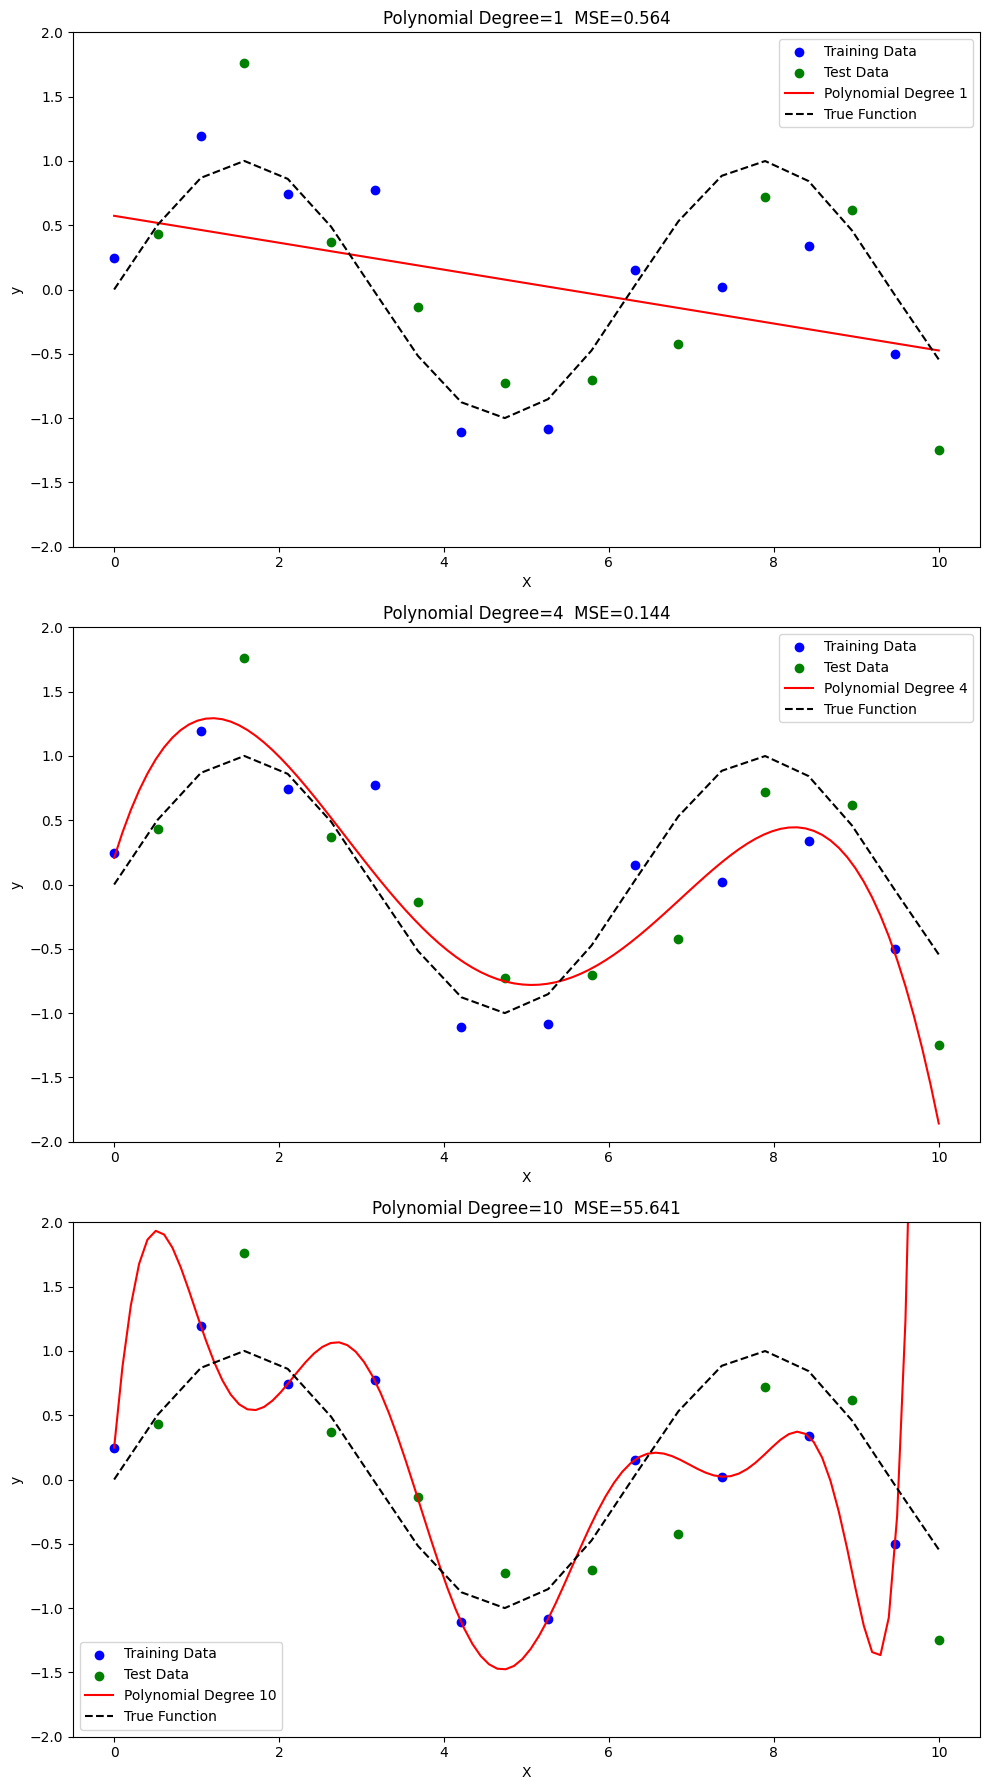

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = np.linspace(0, 10, 20)
# True function is sine wave
y_true = np.sin(X)
# Add some noise to simulate real-world data
y = y_true + np.random.normal(scale=0.5, size=X.shape)

# Reshape X for sklearn
X = X[:, np.newaxis]

# Split data into training and test sets
X_train = X[::2]  # Even indices
y_train = y[::2]
X_test = X[1::2]  # Odd indices
y_test = y[1::2]

# Create X_plot with all data from X and some additional points for more detailed plot
X_plot = np.linspace(0, 10, 100)[:, np.newaxis]


# Degrees of polynomials to fit
degrees = [1, 4, 10]

plt.figure(figsize=(10, 18))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    X_poly_plot = poly_features.transform(X_plot)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    mse = np.mean((model.predict(X_poly_test) - y_test) ** 2)
    # Predictions
    y_poly_pred = model.predict(X_poly_plot)

    # Plotting
    plt.subplot(3, 1, i + 1)
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='green')
    
    plt.plot(X_plot, y_poly_pred, label=f'Polynomial Degree {degree}', color='red')
    plt.plot(X, y_true, label='True Function', color='black', linestyle='dashed')
    plt.title(f'Polynomial Degree={degree}  MSE={mse:0.3f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    # set the y range to be the same for all plots and equal to 2
    plt.ylim(-2, 2)
    # In the legend area also display the MSE
    
plt.tight_layout()
plt.show()
